<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/most_popular_news_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to find the most popular news source
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- sys
</font>

In [ ]:
# coding: utf-8
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import sys
#this is the path for my computer modify accordingly
sys.path.insert(1, '/Users/elenikaranikola/Desktop/NewsCleanser')
from settings import delete_source,ape_mpe_names

<br>
<font size="3">
After installing and importing everything we need to run our project, we will read our data from the output2.csv. This csv contains all the unfilterd data. We need this because we are going to search through the articles to find their sources and furthermore determine which are the most popular ones.
</font>
<br>

In [ ]:
#read the data from output2.csv file
df = pd.read_csv('output2.csv')

#fill all null values, otherwise there will be problems during our text editing
df = df.fillna(" ")

<br>
<font size="3">
In the next next block we will define the functions we will use in this project:

- **plot_barchart(x):** gets as input a dictionary and places the keys in y axis and the the values in x axis.
- **source(x):** gets as input the whole dataframe and uses regex to find a string in our data. This function returns all the the results from the regex in a list of words.
- **second_filter(x):** gets as input the result produced from source function and does a second regex search to eliminate unwanted data.
- **edit_dict(x):** gets as input a dictionary and filters out the keys given from settings file. Returns the edited dictionary.
</font>
<br>

In [ ]:
#function to print output from a given dictionary
def plot_barchart(mydict):
    source = []
    count = []

    for w in sorted(mydict, key=mydict.get, reverse=True):
        source.append(w)
        count.append(mydict[w])

    plt.figure(figsize=(20, 5))
    plt.bar(source[0:10], count[0:10], color = 'darkviolet')
    plt.title('Bar chart for 10 most popular News Sources')
    plt.grid(axis='y')
    plt.show() 
    
#function that finds all sentences that start with the word "πηγη" which means source in greek    
def source(data):
    text_combined = []
    for x in data['article_body']:
        source_sentence = re.findall(r'πηγή.+',x)
        if source_sentence != []:
            value = source_sentence.pop()
            text_combined.append(value[5:35])
    return text_combined

#fuction to do the second filtering
def second_filter(text_combined):
    source_list = []
    for x in text_combined:
        res = re.search(r'[Α-Ωa-zA-Z\.\-\s0-9]+',x)
        if res != None:
            grouped_text = res.group(0)
            # here we check and filter some common unrelative cases
            if len(grouped_text) > 4 or (re.search(r'\.',grouped_text) is None and len(grouped_text)>=4) :
                source_list.append(grouped_text)
    return(source_list)

def edit_dict(mydict):
    ape = 0
    #add in one key all different names for the same source for ape
    for x in ape_mpe_names:
        ape = ape + mydict[x]
    #delete them
    for x in ape_mpe_names:
        del mydict[x]
    #update the ditionary with the final count   
    mydict['ΑΠΕ-ΜΠΕ']= ape

    # do the same for tempo24.gr
    tempo = mydict[' tempo24.gr'] + mydict[' tempo24.news']
    mydict.update({' tempo24.gr':tempo})
    del mydict[' tempo24.news']
    
    return mydict

<br>
<font size="3">
This final code block contains the main code to plot our barchar:
</font>
<br>

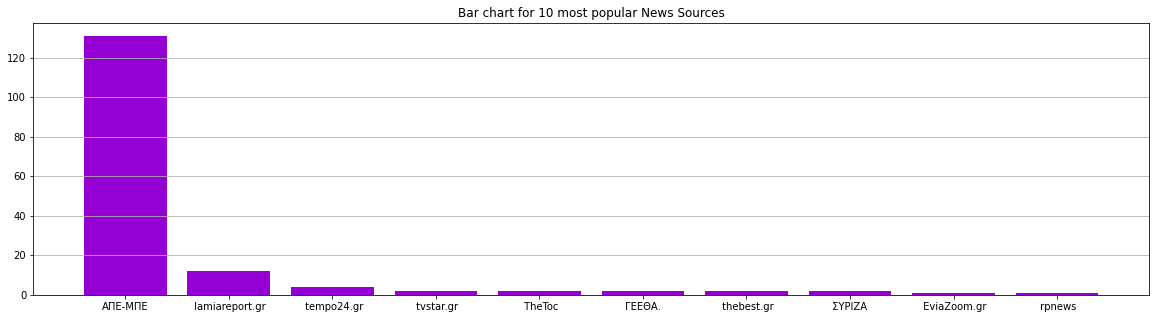

In [ ]:
#find all sentences that start with the word "πηγη" which means source in greek
text_combined = source(df) 

#after the first filter we realize that most sources are given are either in capitel Greek or engilish,
#based on this we do a second filtering
source_list = second_filter(text_combined)

#create a dictionary with key the source and value the number of times listed in our source_list
mydict = {}
my_set = set(source_list) 
for x in my_set:
    number = source_list.count(x)
    mydict.update({x:number})

# delete all the false sources
for x in delete_source:
    del mydict[x]

#find similar names for the same source and add them up
mydict = edit_dict(mydict)   

#plot
plot_barchart(mydict)